# JAM FITTER
## before running this file, run in example01 directory
## jam3d -t 3 input.py
## then 
## cd mcdata
## mcproc .
## mcproc -c 0.01 .

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## Load configuration file

In [2]:
load_config('input.py')

## Load resman

In [3]:
resman = RESMAN(mode='solo', ip=None)

loading sidis data sets 3013

## Load parman

In [4]:
parman=conf['parman']

In [5]:
parman.par

[5.18083901578981,
 0.404126169244575,
 3.9022852503911896,
 0.7987569337489006,
 0.52414,
 6.096200966688166,
 0.711562722927956,
 -11.820678427146092,
 3.033489940810826,
 0.09220735109915476,
 1.5294853396510286,
 -1.2629774703576928,
 3.0269642616074024,
 0.7907882374072348,
 -6.700196618484455,
 0.12405]

## Calculate residuals

In [6]:
resman.get_residuals(parman.par)

(array([-0.49985045,  0.86433989, -0.17274605, -1.14845465, -0.35552255,
        -1.32650822, -0.38240799, -1.07543254, -0.91724966, -1.0447144 ,
        -1.14368815,  0.92312713, -0.5949928 , -1.34072597, -0.5621253 ,
         0.5475335 ,  0.25813913,  0.56214065,  0.0384295 , -0.87450954,
         1.84143941,  0.77301695,  0.91201768,  0.61517449,  0.14318297,
        -0.8523284 ,  1.58637961,  0.49202201,  1.30097657,  2.2884399 ,
         1.67066859,  1.53813542,  0.18901464, -0.18970305, -0.4001651 ,
         1.22558399, -0.2858183 , -0.48064331,  0.82338082, -0.36033678,
        -1.51224524, -0.63293717, -0.86217255, -0.62768979,  0.45486954,
         0.17758959, -0.09370647,  0.16268771,  0.30710115,  0.37392025,
        -1.06690533, -0.44732755,  0.70553907,  0.94625777,  1.13773462,
        -0.20464784,  0.80129095, -1.34112372,  0.79586228,  1.19776891,
         0.84918552, -0.01411838, -0.58771498, -0.94026783, -0.5086432 ,
        -0.41994236, -1.30254943, -0.29410853, -0.1

In [7]:
conf.keys()

['parman',
 'ffk',
 'nruns',
 'itmax',
 'ftol',
 'block size',
 'params',
 'tol',
 'factor',
 'aux',
 'alphaSmode',
 'collinspi',
 'alphaS',
 'ffpi',
 'ncpu',
 'datasets',
 'kappa',
 'evo',
 'cpdf',
 'Q20',
 'sidis tabs',
 'rparams',
 'Q02evo',
 'transversity',
 'pdf',
 'order',
 'lam2evo']

## Transversity distributions

In [8]:
tr=conf['transversity']

In [9]:
tr.get_collinear(0.5,10)

array([ 0.        ,  1.96082289,  0.        , -3.59509872,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

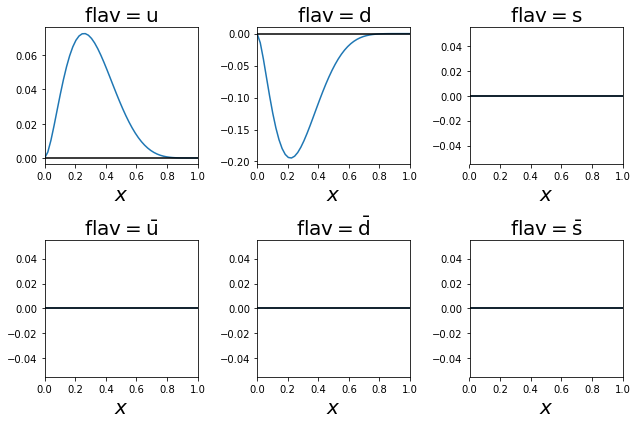

In [9]:
def plot(ax,iflav):
    X=np.linspace(1e-3,1)
    Q2=4
    XF=[x*tr.get_C(x,Q2)[iflav] for x in X]
    ax.plot(X,XF)
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)
    xmin=0.001
    xmax=0.9
    ymin,ymax=ax.get_ylim()
    dy=ymax-ymin
    ax.set_xlim(X.min(),X.max())
    ax.plot([X.min(),X.max()],[0,0],'k-')
    ax.set_ylim(ymin,ymax)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

## Collins FF

In [10]:
col=conf['collinspi']

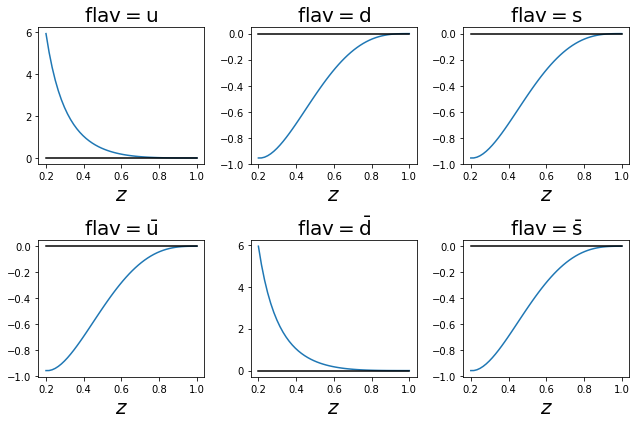

In [11]:
def plot(ax,iflav):
    Z=np.linspace(0.2,1)
    Q2=4
    ZF=[col.get_C(z,Q2)[iflav] for z in Z]
    ax.plot(Z,ZF)
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$z$',size=20)
    zmin=Z.min()
    zmax=Z.max()
    ymin,ymax=ax.get_ylim()
    dy=ymax-ymin
    ax.plot([Z.min(),Z.max()],[0,0],'k-')
    ax.set_ylim(ymin,ymax)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

In [30]:
col.get_collinear(0.1,10)

array([  0.        ,  -3.11836786, -12.06010895, -12.06010895,
        -3.11836786, -12.06010895, -12.06010895,   0.        ,
         0.        ,   0.        ,   0.        ])

In [29]:
conf['params']['collinspi']['db N0 1']

{'fixed': 'u N0 1', 'max': 2, 'min': -15, 'value': 1.5294853396510286}

In [22]:
col.get_collinear(0.1,10.0)

array([  0.        ,  -3.11836786, -12.06010895, -12.06010895,
        -3.11836786, -12.06010895, -12.06010895,   0.        ,
         0.        ,   0.        ,   0.        ])

In [21]:
pd.DataFrame(resman.sidisres.tabs[3000])

,N,Q2,Shift,W2,alpha,col,dependence,dy,hadron,obs,...,stat_u,syst_u,target,thy,value,x,y,yh,yp,z
0,1.0,2.017,0.0,25.404043,0.008028,HERMES,x,3.264809,pi+,AUTcollins,...,0.0078,0.0019,proton,0.011657,0.0036,0.076,0.513,-0.271440,2.993369,0.367
1,1.0,2.467,0.0,23.588038,0.007495,HERMES,x,3.274866,pi+,AUTcollins,...,0.0073,0.0017,proton,0.014931,0.0071,0.098,0.484,-0.434137,2.840730,0.376
2,1.0,3.203,0.0,21.761276,0.007228,HERMES,x,3.268345,pi+,AUTcollins,...,0.0070,0.0018,proton,0.018954,0.0279,0.133,0.464,-0.601035,2.667310,0.379
3,1.0,4.321,0.0,19.791752,0.009492,HERMES,x,3.244939,pi+,AUTcollins,...,0.0091,0.0027,proton,0.022749,0.0289,0.186,0.449,-0.761177,2.483763,0.379
4,1.0,6.179,0.0,17.171660,0.012997,HERMES,x,3.188129,pi+,AUTcollins,...,0.0123,0.0042,proton,0.024376,0.0150,0.275,0.434,-0.912922,2.275208,0.375


In [9]:
    from qcdlib import pdf0,ff0,pdf1,ff1
    from qcdlib.aux import AUX
    from tools.reader import READER

    conf['aux']    = AUX()

    conf['pdf']          = pdf0.PDF()
    conf['transversity'] = pdf1.PDF()
    conf['sivers']       = pdf1.PDF()
    conf['ffpi'] = ff0.FF('pi')
    conf['ffk']  = ff0.FF('k')
    conf['collinspi'] = ff1.FF('pi')
    conf['collinsk']  = ff1.FF('k')


ImportError: cannot import name READER

In [6]:
from qcdlib.pdf1 import PDF
from qcdlib.ff1 import FF
from qcdlib.aux import AUX
conf['resman'] = RESMAN()
conf['aux']= AUX()
conf['transversity']=PDF()
conf['collinspi']=FF('pi')
conf['collinsk']=FF('k')

Q2=1.
z=0.1

#conf['transversity'].get_widths(Q2)
conf['collinspi'].get_C(z,1)


loading sidis data sets 3013

TypeError: 'NoneType' object does not support item assignment

## parameters

In [2]:
# Inputs
#summary = './mcdata/summary.mcp'
config_dy = 'input.py'
# out
sidis = 'sidis.dat'
dat_thy_dy = 'data_and_thy.dat'


## setup path to store the results 

In [3]:
path2results='mcdata'
checkdir(path2results)

## data sets 

In [4]:
conf['datasets']={}

## SIDIS FUU 

In [5]:
conf['datasets']={}
conf['datasets']['sidis']={}

# The data sets to use are here:
conf['datasets']['sidis']['xlsx']={}
# Collins Asy
#conf["datasets"]["sidis"]["xlsx"][4007]="sidis/expdata/4007.xlsx"  #  compass  deuteron   k+   pT
#conf["datasets"]["sidis"]["xlsx"][4006]="sidis/expdata/4006.xlsx"  #  compass  deuteron   k+    x
#conf["datasets"]["sidis"]["xlsx"][4008]="sidis/expdata/4008.xlsx"  #  compass  deuteron   k+    z
#conf["datasets"]["sidis"]["xlsx"][4010]="sidis/expdata/4010.xlsx"  #  compass  deuteron   k-   pT
#conf["datasets"]["sidis"]["xlsx"][4009]="sidis/expdata/4009.xlsx"  #  compass  deuteron   k-    x
#conf["datasets"]["sidis"]["xlsx"][4011]="sidis/expdata/4011.xlsx"  #  compass  deuteron   k-    z
conf["datasets"]["sidis"]["xlsx"][4001]="sidis/expdata/4001.xlsx"  #  compass  deuteron  pi+  pT
conf["datasets"]["sidis"]["xlsx"][4000]="sidis/expdata/4000.xlsx"  #  compass  deuteron  pi+   x
conf["datasets"]["sidis"]["xlsx"][4002]="sidis/expdata/4002.xlsx"  #  compass  deuteron  pi+   z
conf["datasets"]["sidis"]["xlsx"][4004]="sidis/expdata/4004.xlsx"  #  compass  deuteron  pi-   pT
conf["datasets"]["sidis"]["xlsx"][4003]="sidis/expdata/4003.xlsx"  #  compass  deuteron  pi-    x
conf["datasets"]["sidis"]["xlsx"][4005]="sidis/expdata/4005.xlsx"  #  compass  deuteron  pi-    z
#conf["datasets"]["sidis"]["xlsx"][6003]="sidis/expdata/6003.xlsx"  #  compass    proton   k+   pt
#conf["datasets"]["sidis"]["xlsx"][6004]="sidis/expdata/6004.xlsx"  #  compass    proton   k+    x
#conf["datasets"]["sidis"]["xlsx"][6005]="sidis/expdata/6005.xlsx"  #  compass    proton   k+    z
#conf["datasets"]["sidis"]["xlsx"][6000]="sidis/expdata/6000.xlsx"  #  compass    proton   k-   pt
#conf["datasets"]["sidis"]["xlsx"][6001]="sidis/expdata/6001.xlsx"  #  compass    proton   k-    x
#conf["datasets"]["sidis"]["xlsx"][6002]="sidis/expdata/6002.xlsx"  #  compass    proton   k-    z
conf["datasets"]["sidis"]["xlsx"][3027]="sidis/expdata/3027.xlsx"  #  compass    proton  pi+     pt
conf["datasets"]["sidis"]["xlsx"][3025]="sidis/expdata/3025.xlsx"  #  compass    proton  pi+     x
conf["datasets"]["sidis"]["xlsx"][3010]="sidis/expdata/3010.xlsx"  #  compass    proton  pi+     z
conf["datasets"]["sidis"]["xlsx"][3012]="sidis/expdata/3012.xlsx"  #  compass    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3005]="sidis/expdata/3005.xlsx"  #  compass    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3013]="sidis/expdata/3013.xlsx"  #  compass    proton  pi-    z
#conf["datasets"]["sidis"]["xlsx"][3024]="sidis/expdata/3024.xlsx"  #   HERMES    proton   k+   pt
#conf["datasets"]["sidis"]["xlsx"][3007]="sidis/expdata/3007.xlsx"  #   HERMES    proton   k+    x
#conf["datasets"]["sidis"]["xlsx"][3008]="sidis/expdata/3008.xlsx"  #   HERMES    proton   k+    z
#conf["datasets"]["sidis"]["xlsx"][3021]="sidis/expdata/3021.xlsx"  #   HERMES    proton   k-   pt
#conf["datasets"]["sidis"]["xlsx"][3017]="sidis/expdata/3017.xlsx"  #   HERMES    proton   k-    x
#conf["datasets"]["sidis"]["xlsx"][3023]="sidis/expdata/3023.xlsx"  #   HERMES    proton   k-    z
conf["datasets"]["sidis"]["xlsx"][3026]="sidis/expdata/3026.xlsx"  #   HERMES    proton pi+   pt
conf["datasets"]["sidis"]["xlsx"][3000]="sidis/expdata/3000.xlsx"  #   HERMES    proton pi+    x
conf["datasets"]["sidis"]["xlsx"][3003]="sidis/expdata/3003.xlsx"  #   HERMES    proton pi+    z
conf["datasets"]["sidis"]["xlsx"][3016]="sidis/expdata/3016.xlsx"  #   HERMES    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3004]="sidis/expdata/3004.xlsx"  #   HERMES    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3018]="sidis/expdata/3018.xlsx"  #   HERMES    proton  pi-    z

conf['datasets']['sidis']['norm']={}
for idx in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][idx]={'value':1,'fixed':True,'min':0,'max':1} 


conf['datasets']['sidis']['filters']={}
# The cuts you want to impose on the data are here:
for idx in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['filters'][idx]="z>0.2 and z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"


## parameters

In [7]:
conf['params']={}

### PDF parameters

In [8]:
conf['params']={}
# Parameters in gaussian approximation, parton model:
# TMD PDF:
conf['params']['pdf']={}
conf['params']['pdf']['widths1_uv']  ={'value':    5.73014e-01,'min': 0,'max':1,'fixed':True}
conf['params']['pdf']['widths2_uv']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['pdf']['widths1_dv']  ={'value':    5.73014e-01,'min': 0,'max':1,'fixed':'widths1_uv'}
conf['params']['pdf']['widths2_dv']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':'widths2_uv'}
conf['params']['pdf']['widths1_sea'] ={'value':    6.26747e-01,'min': 0,'max':1,'fixed':True}
conf['params']['pdf']['widths2_sea'] ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}

# TMD FF:
conf['params']['ffpi']={}
conf['params']['ffpi']['widths1_fav']   ={'value':    1.16604e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffpi']['widths2_fav']   ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffpi']['widths1_ufav'] ={'value':    1.37065e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffpi']['widths2_ufav'] ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffk']={}
conf['params']['ffk']['widths1_fav']    ={'value':    1.32333e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffk']['widths2_fav']    ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffk']['widths1_ufav']  ={'value':    1.85630e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffk']['widths2_ufav']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffh']={}
conf['params']['ffh']['widths1_fav']    ={'value':    1.32925e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffh']['widths2_fav']    ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffh']['widths1_ufav']  ={'value':    1.86073e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffh']['widths2_ufav']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}


# transversty 
conf['params']['transversity']={}
conf['params']['transversity']['widths1_uv']  ={'value':    1.25054e-07, 'min':0, 'max':1, 'fixed': False}
conf['params']['transversity']['widths1_dv']  ={'value':    1.25054e-07, 'min':0, 'max':1, 'fixed': 'widths1_uv'}
conf['params']['transversity']['widths1_sea'] ={'value':    6.79940e+00, 'min':0, 'max':1, 'fixed': False}
conf['params']['transversity']['widths2_uv']  ={'value':    0.00000e+00, 'min':0, 'max':1, 'fixed': True}
conf['params']['transversity']['widths2_dv']  ={'value':    0.00000e+00, 'min':0, 'max':1, 'fixed': True}
conf['params']['transversity']['widths2_sea'] ={'value':    0.00000e+00, 'min':0, 'max':1, 'fixed': True}

conf['params']['transversity']['u N0 1'] ={'value':    5.18703e+00, 'min': -10.0, 'max': 10.0, 'fixed': False}
conf['params']['transversity']['u N1 1'] ={'value':    0.00000e+00, 'min': -10.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u a0 1'] ={'value':    7.29075e-01, 'min':-2.0, 'max':10.0, 'fixed': False}
conf['params']['transversity']['u a1 1'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['u b0 1'] ={'value':    6.48310e+00, 'min': 0.0, 'max':10.0, 'fixed': False}
conf['params']['transversity']['u b1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['u c0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u c1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u d0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u d1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u N0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u N1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u a0 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['u a1 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['u b0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['u b1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['u c0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u c1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u d0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['u d1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}


conf['params']['transversity']['d N0 1'] ={'value':   -4.23118e+00, 'min': -10.0, 'max': 10.0, 'fixed': False}
conf['params']['transversity']['d N1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d a0 1'] ={'value':    8.08838e-01, 'min':-2.0, 'max':10.0, 'fixed': False}
conf['params']['transversity']['d a1 1'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['d b0 1'] ={'value':    6.80542e+00, 'min': 0.0, 'max':10.0, 'fixed': False}
conf['params']['transversity']['d b1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['d c0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d c1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d d0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d d1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d N0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d N1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d a0 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['d a1 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['d b0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['d b1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['d c0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d c1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d d0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['d d1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}


conf['params']['transversity']['s N0 1'] ={'value':    2.97183e+00, 'min': -10.0, 'max': 10.0, 'fixed': False}
conf['params']['transversity']['s N1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s a0 1'] ={'value':    2.85752e-02, 'min':-2.0, 'max':10.0, 'fixed': False}
conf['params']['transversity']['s a1 1'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['s b0 1'] ={'value':    9.73628e+01, 'min': 0.0, 'max':10.0, 'fixed': False}
conf['params']['transversity']['s b1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['s c0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s c1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s d0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s d1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s N0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s N1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s a0 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['s a1 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['s b0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['s b1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': True}
conf['params']['transversity']['s c0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s c1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s d0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}
conf['params']['transversity']['s d1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': True}


conf['params']['transversity']['ub N0 1'] ={'value':    2.97183e+00, 'min': 0.0, 'max': 10 , 'fixed': 's N0 1'}
conf['params']['transversity']['ub N1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N1 1'}
conf['params']['transversity']['ub a0 1'] ={'value':    2.85752e-02, 'min':-2.0, 'max':10.0, 'fixed': 's a0 1'}
conf['params']['transversity']['ub a1 1'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a1 1'}
conf['params']['transversity']['ub b0 1'] ={'value':    9.73628e+01, 'min': 0.0, 'max':10.0, 'fixed': 's b0 1'}
conf['params']['transversity']['ub b1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b1 1'}
conf['params']['transversity']['ub c0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c0 1'}
conf['params']['transversity']['ub c1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c1 1'}
conf['params']['transversity']['ub d0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d0 1'}
conf['params']['transversity']['ub d1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d1 1'}
conf['params']['transversity']['ub N0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N0 2'}
conf['params']['transversity']['ub N1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N1 2'}
conf['params']['transversity']['ub a0 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a0 2'}
conf['params']['transversity']['ub a1 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a1 2'}
conf['params']['transversity']['ub b0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b0 2'}
conf['params']['transversity']['ub b1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b1 2'}
conf['params']['transversity']['ub c0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c0 2'}
conf['params']['transversity']['ub c1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c1 2'}
conf['params']['transversity']['ub d0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d0 2'}
conf['params']['transversity']['ub d1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d1 2'}

conf['params']['transversity']['db N0 1'] ={'value':    2.97183e+00, 'min': 0.0, 'max': 10 , 'fixed': 's N0 1'}
conf['params']['transversity']['db N1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N1 1'}
conf['params']['transversity']['db a0 1'] ={'value':    2.85752e-02, 'min':-2.0, 'max':10.0, 'fixed': 's a0 1'}
conf['params']['transversity']['db a1 1'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a1 1'}
conf['params']['transversity']['db b0 1'] ={'value':    9.73628e+01, 'min': 0.0, 'max':10.0, 'fixed': 's b0 1'}
conf['params']['transversity']['db b1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b1 1'}
conf['params']['transversity']['db c0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c0 1'}
conf['params']['transversity']['db c1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c1 1'}
conf['params']['transversity']['db d0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d0 1'}
conf['params']['transversity']['db d1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d1 1'}
conf['params']['transversity']['db N0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N0 2'}
conf['params']['transversity']['db N1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N1 2'}
conf['params']['transversity']['db a0 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a0 2'}
conf['params']['transversity']['db a1 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a1 2'}
conf['params']['transversity']['db b0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b0 2'}
conf['params']['transversity']['db b1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b1 2'}
conf['params']['transversity']['db c0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c0 2'}
conf['params']['transversity']['db c1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c1 2'}
conf['params']['transversity']['db d0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d0 2'}
conf['params']['transversity']['db d1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d1 2'}

conf['params']['transversity']['sb N0 1'] ={'value':    2.97183e+00, 'min': 0.0, 'max': 10 , 'fixed': 's N0 1'}
conf['params']['transversity']['sb N1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N1 1'}
conf['params']['transversity']['sb a0 1'] ={'value':    2.85752e-02, 'min':-2.0, 'max':10.0, 'fixed': 's a0 1'}
conf['params']['transversity']['sb a1 1'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a1 1'}
conf['params']['transversity']['sb b0 1'] ={'value':    9.73628e+01, 'min': 0.0, 'max':10.0, 'fixed': 's b0 1'}
conf['params']['transversity']['sb b1 1'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b1 1'}
conf['params']['transversity']['sb c0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c0 1'}
conf['params']['transversity']['sb c1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c1 1'}
conf['params']['transversity']['sb d0 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d0 1'}
conf['params']['transversity']['sb d1 1'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d1 1'}
conf['params']['transversity']['sb N0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N0 2'}
conf['params']['transversity']['sb N1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max': 1.0, 'fixed': 's N1 2'}
conf['params']['transversity']['sb a0 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a0 2'}
conf['params']['transversity']['sb a1 2'] ={'value':    0.00000e+00, 'min':-2.0, 'max':10.0, 'fixed': 's a1 2'}
conf['params']['transversity']['sb b0 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b0 2'}
conf['params']['transversity']['sb b1 2'] ={'value':    0.00000e+00, 'min': 0.0, 'max':10.0, 'fixed': 's b1 2'}
conf['params']['transversity']['sb c0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c0 2'}
conf['params']['transversity']['sb c1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's c1 2'}
conf['params']['transversity']['sb d0 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d0 2'}
conf['params']['transversity']['sb d1 2'] ={'value':    0.00000e+00, 'min':-1.0, 'max': 1.0, 'fixed': 's d1 2'}



# COLLINS TMD FF:
conf['params']['collinspi']={}

conf['params']['collinspi']['widths1_fav']   ={'value':    6.44970e-01,'min':0, 'max':1, 'fixed':False}
conf['params']['collinspi']['widths1_ufav'] ={'value':    2.70783e-01,'min':0, 'max':1, 'fixed':False}
conf['params']['collinspi']['widths2_fav']   ={'value':    0.00000e+00,'min':0, 'max':1, 'fixed':True}
conf['params']['collinspi']['widths2_ufav'] ={'value':    0.00000e+00,'min':0, 'max':1, 'fixed':True}

conf['params']['collinspi']['u N0 1'] ={'value':   -9.08730e-02,'min': -15, 'max': 2, 'fixed':False}
conf['params']['collinspi']['u N1 1'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':True}
conf['params']['collinspi']['u a0 1'] ={'value':    5.17258e-01,'min':-2.5, 'max': 5, 'fixed':False}
conf['params']['collinspi']['u a1 1'] ={'value':    0.00000e+00,'min':-2, 'max': 5, 'fixed':True}
conf['params']['collinspi']['u b0 1'] ={'value':    5.99412e+00,'min': 0, 'max':10, 'fixed':False}
conf['params']['collinspi']['u b1 1'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['u c0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u c1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u d0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u d1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u N0 2'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':True}
conf['params']['collinspi']['u N1 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u a0 2'] ={'value':    0.00000e+00,'min':-2, 'max': 20, 'fixed':True}
conf['params']['collinspi']['u a1 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['u b0 2'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['u b1 2'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['u c0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u c1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u d0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['u d1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}

conf['params']['collinspi']['d N0 1'] ={'value':   -4.76175e+00,'min': -10, 'max': 10, 'fixed':False}
conf['params']['collinspi']['d N1 1'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d a0 1'] ={'value':   -8.50126e-01,'min':-2, 'max': 2, 'fixed':False}
conf['params']['collinspi']['d a1 1'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['d b0 1'] ={'value':    3.87561e+00,'min': 0, 'max':10, 'fixed':False}
conf['params']['collinspi']['d b1 1'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['d c0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d c1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d d0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d d1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d N0 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d N1 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d a0 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['d a1 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['d b0 2'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['d b1 2'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['d c0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d c1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d d0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['d d1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}

conf['params']['collinspi']['s N0 1'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s N1 1'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s a0 1'] ={'value':   -5.00000e-01,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['s a1 1'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['s b0 1'] ={'value':    3.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['s b1 1'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['s c0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s c1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s d0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s d1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s N0 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s N1 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s a0 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['s a1 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2, 'fixed':True}
conf['params']['collinspi']['s b0 2'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['s b1 2'] ={'value':    0.00000e+00,'min': 0, 'max':10, 'fixed':True}
conf['params']['collinspi']['s c0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s c1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s d0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}
conf['params']['collinspi']['s d1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1, 'fixed':True}


conf['params']['collinspi']['ub N0 1'] ={'value':   -9.08730e-02,'min': -15, 'max': 2,  'fixed':'u N0 1'}
conf['params']['collinspi']['ub N1 1'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':'u N1 1'}
conf['params']['collinspi']['ub a0 1'] ={'value':    5.17258e-01,'min':-2.5, 'max': 5,  'fixed':'u a0 1'}
conf['params']['collinspi']['ub a1 1'] ={'value':    0.00000e+00,'min':-2, 'max': 5,    'fixed':'u a1 1'}
conf['params']['collinspi']['ub b0 1'] ={'value':    5.99412e+00,'min': 0, 'max':10,    'fixed':'u b0 1'}
conf['params']['collinspi']['ub b1 1'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'u b1 1'}
conf['params']['collinspi']['ub c0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u c0 1'}
conf['params']['collinspi']['ub c1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u c1 1'}
conf['params']['collinspi']['ub d0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u d0 1'}
conf['params']['collinspi']['ub d1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u d1 1'}
conf['params']['collinspi']['ub N0 2'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':'u N0 2'}
conf['params']['collinspi']['ub N1 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1,    'fixed':'u N1 2'}
conf['params']['collinspi']['ub a0 2'] ={'value':    0.00000e+00,'min':-2, 'max': 20,   'fixed':'u a0 2'}
conf['params']['collinspi']['ub a1 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2,    'fixed':'u a1 2'}
conf['params']['collinspi']['ub b0 2'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'u b0 2'}
conf['params']['collinspi']['ub b1 2'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'u b1 2'}
conf['params']['collinspi']['ub c0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u c0 2'}
conf['params']['collinspi']['ub c1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u c1 2'}
conf['params']['collinspi']['ub d0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u d0 2'}
conf['params']['collinspi']['ub d1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'u d1 2'}

conf['params']['collinspi']['db N0 1'] ={'value':   -4.76175e+00,'min': -15, 'max': 2,  'fixed':'d N0 1'}
conf['params']['collinspi']['db N1 1'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':'d N1 1'}
conf['params']['collinspi']['db a0 1'] ={'value':   -8.50126e-01,'min':-2.5, 'max': 5,  'fixed':'d a0 1'}
conf['params']['collinspi']['db a1 1'] ={'value':    0.00000e+00,'min':-2, 'max': 5,    'fixed':'d a1 1'}
conf['params']['collinspi']['db b0 1'] ={'value':    3.87561e+00,'min': 0, 'max':10,    'fixed':'d b0 1'}
conf['params']['collinspi']['db b1 1'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'d b1 1'}
conf['params']['collinspi']['db c0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d c0 1'}
conf['params']['collinspi']['db c1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d c1 1'}
conf['params']['collinspi']['db d0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d d0 1'}
conf['params']['collinspi']['db d1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d d1 1'}
conf['params']['collinspi']['db N0 2'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':'d N0 2'}
conf['params']['collinspi']['db N1 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1,    'fixed':'d N1 2'}
conf['params']['collinspi']['db a0 2'] ={'value':    0.00000e+00,'min':-2, 'max': 20,   'fixed':'d a0 2'}
conf['params']['collinspi']['db a1 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2,    'fixed':'d a1 2'}
conf['params']['collinspi']['db b0 2'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'d b0 2'}
conf['params']['collinspi']['db b1 2'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'d b1 2'}
conf['params']['collinspi']['db c0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d c0 2'}
conf['params']['collinspi']['db c1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d c1 2'}
conf['params']['collinspi']['db d0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d d0 2'}
conf['params']['collinspi']['db d1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'d d1 2'}

conf['params']['collinspi']['sb N0 1'] ={'value':    0.00000e+00,'min': -15, 'max': 2,  'fixed':'s N0 1'}
conf['params']['collinspi']['sb N1 1'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':'s N1 1'}
conf['params']['collinspi']['sb a0 1'] ={'value':   -5.00000e-01,'min':-2.5, 'max': 5,  'fixed':'s a0 1'}
conf['params']['collinspi']['sb a1 1'] ={'value':    0.00000e+00,'min':-2, 'max': 5,    'fixed':'s a1 1'}
conf['params']['collinspi']['sb b0 1'] ={'value':    3.00000e+00,'min': 0, 'max':10,    'fixed':'s b0 1'}
conf['params']['collinspi']['sb b1 1'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'s b1 1'}
conf['params']['collinspi']['sb c0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s c0 1'}
conf['params']['collinspi']['sb c1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s c1 1'}
conf['params']['collinspi']['sb d0 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s d0 1'}
conf['params']['collinspi']['sb d1 1'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s d1 1'}
conf['params']['collinspi']['sb N0 2'] ={'value':    0.00000e+00,'min': -10, 'max': 10, 'fixed':'s N0 2'}
conf['params']['collinspi']['sb N1 2'] ={'value':    0.00000e+00,'min': 0, 'max': 1,    'fixed':'s N1 2'}
conf['params']['collinspi']['sb a0 2'] ={'value':    0.00000e+00,'min':-2, 'max': 20,   'fixed':'s a0 2'}
conf['params']['collinspi']['sb a1 2'] ={'value':    0.00000e+00,'min':-2, 'max': 2,    'fixed':'s a1 2'}
conf['params']['collinspi']['sb b0 2'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'s b0 2'}
conf['params']['collinspi']['sb b1 2'] ={'value':    0.00000e+00,'min': 0, 'max':10,    'fixed':'s b1 2'}
conf['params']['collinspi']['sb c0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s c0 2'}
conf['params']['collinspi']['sb c1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s c1 2'}
conf['params']['collinspi']['sb d0 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s d0 2'}
conf['params']['collinspi']['sb d1 2'] ={'value':    0.00000e+00,'min':-1, 'max': 1,    'fixed':'s d1 2'}



## PDFs and FFs

In [12]:
from obslib.sidis import collins0 as collins

In [9]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,0.999)
Z=np.append(Z1,Z2)
Hpi=calc(lambda : [conf['collins'].get_C(z,1,'pi+') for z in Z])

NameError: name 'calc' is not defined

In [23]:
from qcdlib.pdf1 import PDF
from qcdlib.ff1 import FF
from qcdlib.aux import AUX
conf['resman'] = RESMAN()
conf['aux']= AUX()
conf['transversity']=PDF()
conf['collinspi']=FF('pi')
conf['collinsk']=FF('k')

Q2=1.
z=0.1

#conf['transversity'].get_widths(Q2)
conf['collinspi'].get_C(z,1)

loading sidis data sets 4000

ValueError: expr must be a string to be evaluated, <type 'int'> given

### combine multiple runs into one big run

In [9]:
runs=load(summary)

In [10]:
load_config(config_dy)
conf['resman']=RESMAN(mode='solo',ip=None,nworkers=None)

loading sidis data sets 1007

### distribution of parameters

In [11]:
tab={}
tab['nll']=runs['all']['nll']
tab['weights']=runs['all']['weights']
samples=np.transpose(runs['all']['samples'])
for i in range(len(conf['parman'].order)):
   _,kind,par=conf['parman'].order[i]
   tab['%s-%s'%(kind,par)]=samples[i]
tab=pd.DataFrame(tab)

In [13]:
tab

,ffk-widths1_fav,ffk-widths1_ufav,ffpi-widths1_fav,ffpi-widths1_ufav,nll,pdf-widths1_sea,pdf-widths1_uv,weights
0,0.136289,0.175608,0.135968,0.156698,155.987675,0.538159,0.456147,6.217291e-23
1,0.136286,0.175632,0.135968,0.156699,155.987675,0.538137,0.456145,6.394927e-23
2,0.136290,0.175615,0.135968,0.156702,155.987675,0.538153,0.456145,6.577640e-23
3,0.136295,0.175613,0.135968,0.156702,155.987675,0.538136,0.456144,6.765572e-23
4,0.136287,0.175629,0.135969,0.156701,155.987675,0.538124,0.456142,6.958874e-23
5,0.136291,0.175581,0.135968,0.156700,155.987675,0.538142,0.456143,7.157699e-23
6,0.136291,0.175600,0.135969,0.156698,155.987675,0.538152,0.456137,7.362205e-23
7,0.136293,0.175597,0.135970,0.156700,155.987675,0.538137,0.456135,7.572554e-23
8,0.136287,0.175626,0.135967,0.156701,155.987675,0.538167,0.456144,7.788912e-23
9,0.136291,0.175615,0.135969,0.156701,155.987675,0.538155,0.456139,8.011453e-23


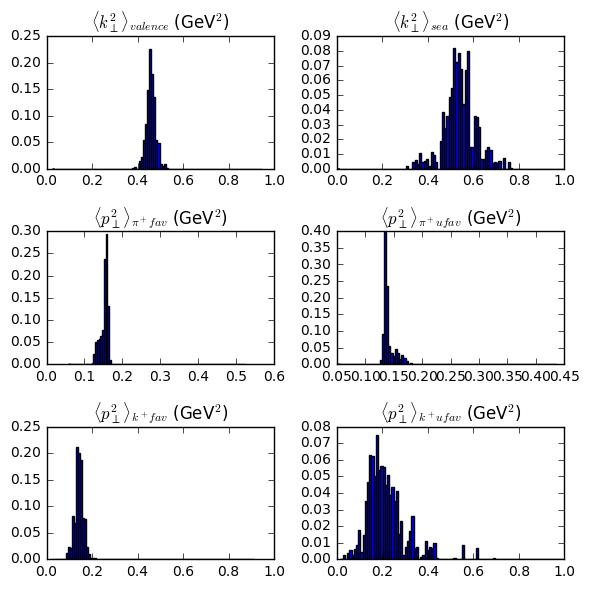

In [15]:
nrows,ncols=3,2
fig = py.figure(figsize=(ncols*3,nrows*2))


def title(par,particle):
    if par == 'widths1_uv':
        return r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)"
    if par == 'widths1_sea':
        return r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)"
    if par == 'widths1_fav':
        if particle=='pi':
            return r"$\langle p_\perp^2 \rangle_{\pi^+ fav}$ (GeV$^2$)"
        if particle=='k':
            return r"$\langle p_\perp^2 \rangle_{k^+ fav}$ (GeV$^2$)"
    if par == 'widths1_ufav':
        if particle=='pi':
            return r"$\langle p_\perp^2 \rangle_{\pi^+ ufav}$ (GeV$^2$)"
        if particle=='k':
            return r"$\langle p_\perp^2 \rangle_{k^+ ufav}$ (GeV$^2$)"
 


global cnt
cnt=0
def plot(tags):
   global cnt
   for i in range(len(tags)):
       cnt+=1
       if tags[i]==None: continue
       ax=py.subplot(nrows,ncols,cnt)
       kind,par=tags[i].split('-')
       if 'pdf' in kind:
        particle = 'p'
       elif 'ff' in kind:
        if 'pi' in kind:
            particle = 'pi'
        elif 'k' in kind:
            particle = 'k'

       if kind=='pdf':
           vmin=conf['params']['pdf'][par]['min']
           vmax=conf['params']['pdf'][par]['max']
           R=(vmin,vmax)
       elif kind=='ff' and particle=='pi':
           vmin=conf['params']['ffpi'][par]['min']
           vmax=conf['params']['ffpi'][par]['max']
           R=(vmin,vmax)
       elif kind=='ff' and particle=='k':
           vmin=conf['params']['ffk'][par]['min']
           vmax=conf['params']['ffk'][par]['max']
           R=(vmin,vmax)
       

       R=None
       #for k in runs:
       #    ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
       #ax.hist(tab[tags[i]],normed=True)
       #tabk=tab.query('nll<1300')
       ax.hist(tab[tags[i]],range=R,bins=100,weights=tab['weights'])
       #ax.set_title(par)
       ax.set_title(title(par,particle))

       
       #print samples.T[idx]
       #print weights
       #ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
       #ax.set_title(tags[i])
       #ax.set_xlim(vmin,vmax)
   py.tight_layout()


plot(['pdf-widths1_uv','pdf-widths1_sea'])
plot(['ffpi-widths1_fav','ffpi-widths1_ufav'])
plot(['ffk-widths1_fav','ffk-widths1_ufav'])



## data vs theory

In [16]:
data={'weights':runs['all']['weights']}
cnt=0
for s in runs['all']['samples']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(runs['all']['samples'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results, sid_dy))   

2292/2292

### compute averages and collect results

In [17]:
data=load('%s/%s'%(path2results, sid_dy))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [18]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results, dat_thy_dy))  

sidis


In [19]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2  chi2/npts      rchi2      nchi2
   1000     proton        pi+     hermes          M    38     148.09       3.90        0.00       0.00
   1001     proton        pi-     hermes          M    37      56.23       1.52        0.00       0.00
   1002     proton         k+     hermes          M    11       7.17       0.65        0.00       0.00
   1003     proton         k-     hermes          M    10       2.42       0.24        0.00       0.00
   1004   deuteron        pi+     hermes          M    39      81.77       2.10        0.00       0.00
   1005   deuteron        pi-     hermes          M    38      39.24       1.03        0.00       0.00
   1006   deuteron         k+     hermes          M    10      10.21       1.02        0.00       0.00
   1007   deuteron         k-     hermes          M    11       8.85       0.80        0.00       0.00


### distribution of parameters

0.458141891084 0.0204754960346


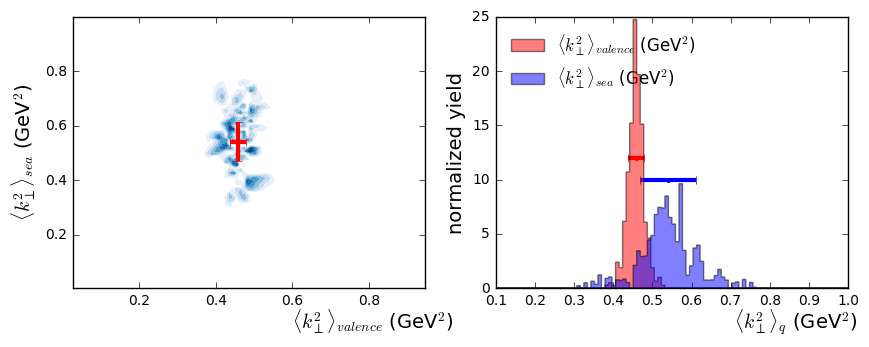

In [21]:
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from matplotlib.mlab import griddata


nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*3.5))

samples2=runs['all']['samples']
weights2=runs['all']['weights']

ax=py.subplot(121)

xgrid = np.linspace(np.amin(tab['pdf-widths1_uv']), np.amax(tab['pdf-widths1_uv']), 100)
ygrid = np.linspace(np.amin(tab['pdf-widths1_sea']), np.amax(tab['pdf-widths1_sea']), 100)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata(tab['pdf-widths1_uv'],tab['pdf-widths1_sea'],weights2, xgrid, ygrid,interp='linear')
zgrid/=np.amax(zgrid)
ax.contourf(xgrid, ygrid, zgrid,cmap=cm.Blues,levels=[0.15,0.3,0.45,0.6,0.75,0.9,1.05])

meanval=np.einsum('i,i',tab['pdf-widths1_uv'],weights2)
stdval=np.einsum('i,i',(tab['pdf-widths1_uv']-meanval)**2,weights2)**0.5

meansea=np.einsum('i,i',tab['pdf-widths1_sea'],weights2)
stdsea=np.einsum('i,i',(tab['pdf-widths1_sea']-meansea)**2,weights2)**0.5


ax.errorbar([meanval],[meansea],xerr=stdval,yerr=stdsea,fmt='r.',elinewidth=3,alpha=1.)
 
#ax.tick_params(axis='both', which='major', labelsize=18, direction='in')
ax.set_xlabel(r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)",size=14)
ax.xaxis.set_label_coords(0.85, -0.07)
#ax.set_xlim(0.0,0.55)
#ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
#ax.set_xticklabels([r'$\boldsymbol{0}$','',r'$\boldsymbol{0.2}$','',r'$\boldsymbol{0.4}$',''])
ax.set_ylabel(r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)",size=14)

##############################################
ax=py.subplot(122)

R=(0.1,1.)
bins=100

ax.hist(tab['pdf-widths1_uv'],histtype='stepfilled',range=R,weights=weights2,bins=bins,facecolor='r'\
   ,edgecolor='k'\
   ,label=r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)",normed=True,alpha=0.5,zorder=10);

ax.hist(tab['pdf-widths1_sea'],histtype='stepfilled',range=R,weights=weights2,bins=bins,facecolor='b'\
   ,edgecolor='k'\
   ,label=r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)",normed=True,alpha=0.5,zorder=10);


ax.errorbar([meansea],10,xerr=stdsea,yerr=0,fmt='b.',elinewidth=3,alpha=1.)

ax.errorbar([meanval],12,xerr=stdval,yerr=0,fmt='r.',elinewidth=3,alpha=1.)

meanfffav=np.einsum('i,i',tab['ffpi-widths1_fav'],weights2)
stdfffav=np.einsum('i,i',(tab['ffpi-widths1_fav']-meanfffav)**2,weights2)**0.5

meanffunfav=np.einsum('i,i',tab['ffpi-widths1_ufav'],weights2)
stdffunfav=np.einsum('i,i',(tab['ffpi-widths1_ufav']-meanffunfav)**2,weights2)**0.5

meanffkfav=np.einsum('i,i',tab['ffpi-widths1_fav'],weights2)
stdffkfav=np.einsum('i,i',(tab['ffpi-widths1_fav']-meanffkfav)**2,weights2)**0.5

meanffkunfav=np.einsum('i,i',tab['ffpi-widths1_ufav'],weights2)
stdffkunfav=np.einsum('i,i',(tab['ffpi-widths1_ufav']-meanffkunfav)**2,weights2)**0.5



descriptive_stat = [[float(meanval), stdval], [float(meansea), stdsea], [float(meanfffav),stdfffav],
                    [float(meanffunfav),stdffunfav], [float(meanffkfav),stdffkfav],
                    [float(meanffkunfav),stdffkunfav]]


print meanval, stdval

#ax.tick_params(axis='both', which='major', labelsize=18, direction='in')
ax.set_xlabel(r"$\langle k_\perp^2 \rangle_{q}$ (GeV$^2$)",size=14)
#ax.set_xlim([0,1.5])
#ax.set_xticks([0,0.25,0.5,0.75,1,1.25])
#ax.set_xticklabels([r'$\boldsymbol{0}$','',r'$\boldsymbol{0.5}$','',r'$\boldsymbol{1}$',''])
ax.xaxis.set_label_coords(0.85, -0.07)
ax.set_ylabel(r'normalized yield',size=14)
#ax.set_ylim([0,7.5])
#ax.set_yticks([0,2,4,6])
#ax.set_yticklabels([r'$\boldsymbol{0}$',r'$\boldsymbol{2}$',r'$\boldsymbol{4}$',r'$\boldsymbol{6}$'])
ax.legend(frameon=False,fontsize=12,loc=2)
#ax.text(0.87,0.87,r'$\boldsymbol{\rm (b)}$',size=20,transform=ax.transAxes,color='k',alpha=1)

#py.tight_layout()
py.savefig("%s/%s" % (path2results, fig_seperation_dy))



In [22]:
descriptive_stat

[[0.4581418910844113, 0.020475496034563018],
 [0.5404131934643089, 0.07137533555605656],
 [0.15180594382041368, 0.0098981141102067408],
 [0.14022455184393, 0.0097526007531058626],
 [0.15180594382041368, 0.0098981141102067408],
 [0.14022455184393, 0.0097526007531058626]]

### plot data and theory

In [23]:
from matplotlib import rc
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})


data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "proton")]

In [24]:
#####################
# reading the data ##
#####################
#dat=pd.read_excel('E:/Laptop/School/Interships/Dr_Prokudin/Juniper82/PHYS296/dat/expdat/1000.xlsx');
#dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');
dat=pd.read_excel('../../database/sidis/expdata/1000.xlsx');

In [25]:
######################
# Calculated values ##
######################
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error

data["delta"] = np.sqrt(data["stat_u"]**2.0) # measurment error

In [26]:
##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot

# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

data['xBin'] = pd.cut(data['x'], xBin,labels = False, retbins=0)
data['Q2Bin'] = pd.cut(data['Q2'], Q2Bin,labels = False, retbins=0)
data['zBin'] = pd.cut(data['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

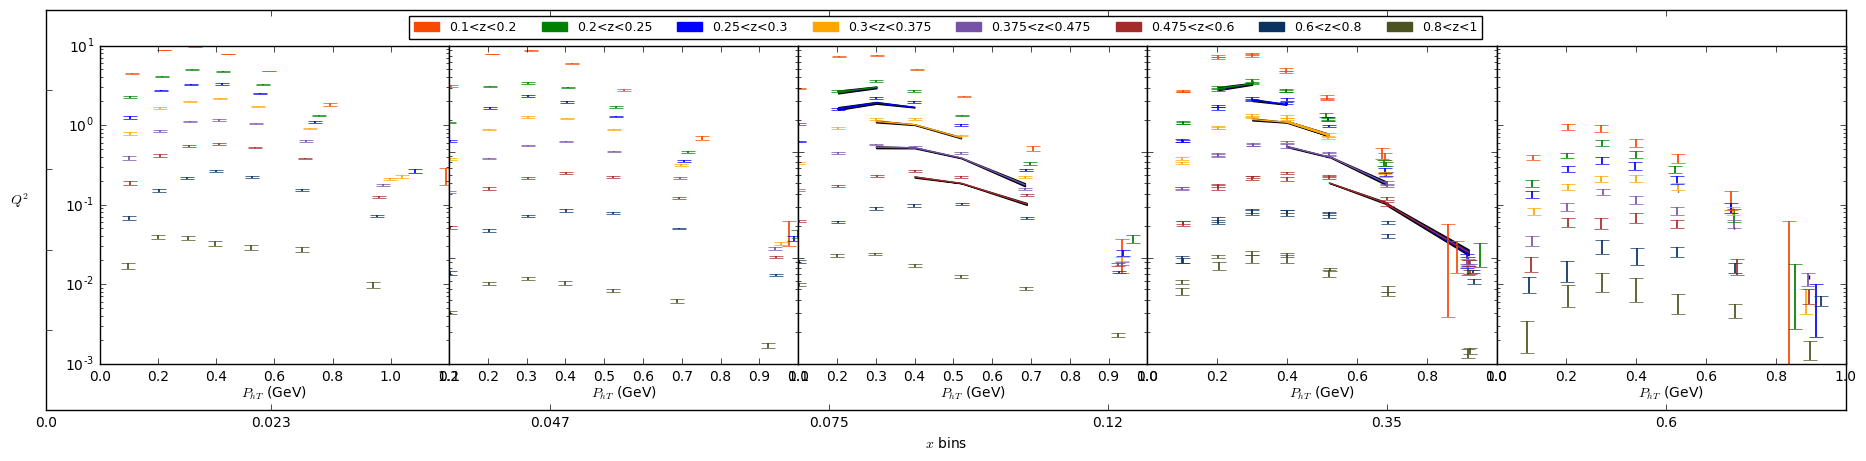

In [27]:
###############
# HermesPlot ##
###############  Reduced matix 
# initialize the figure
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

fig1=plt.figure(figsize=(18, 4),facecolor="white") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5 , subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
#ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.8,4.35,5.9,7.45,9,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$",rotation="horizontal",labelpad = 15)
#ax.grid() # grid currently off

# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"#7851a9","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='0.1<z<0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='0.2<z<0.25')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='0.25<z<0.3')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='0.3<z<0.375')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='0.375<z<0.475')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='0.475<z<0.6')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='0.6<z<0.8')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='0.8<z<1')
          
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],
          loc='upper center',
          ncol=8,prop={'size': 9}
          )
          
for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
        
        maskX_thr = data['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY_thr = data['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        
        xydata = data[maskX_thr & maskY_thr] # subset of data for Jth xBin and Fth Q2Bin
        
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            maskZ_thr = xydata["zBin"].isin([z])
            databin_thr = xydata[maskZ_thr]
            
            if f != 0:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="",color = Zcolor[z],elinewidth=1.25)
                ax.set_xlabel(r"$p_T$ (GeV)",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) # theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yticklabels('')
               
            else:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="", color = Zcolor[z],elinewidth=1.25)
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) #theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error

                
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yscale('log')
plt.savefig("%s/%s" % (path2results, fig_hermes_dy))             